In [10]:
import numpy as np 
import pandas as pd 

In [3]:
dataset = pd.read_csv('American Express User Exit Prediction.csv')

In [4]:
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [20]:
model = Sequential([
  Dense(6, activation='relu'),
  Dense(1, activation='sigmoid')
])

In [21]:
model.compile(optimizer=SGD(learning_rate=0.1), loss='binary_crossentropy', metrics=['accuracy'])

In [39]:
from tensorflow.keras.callbacks import EarlyStopping

callback = EarlyStopping(
    monitor='val_loss',       # Metric to monitor
    min_delta=0.001,          # Minimum change for improvement
    patience=10,               # Number of epochs to wait before stopping
    verbose=1,                # Print messages when early stopping is triggered
    mode='min',               # Minimize the loss
    restore_best_weights=True # Restore best weights
)

In [40]:
history = model.fit(X_train, y_train, batch_size = 32, epochs = 120,validation_data=(X_test, y_test), callbacks=callback)

Epoch 1/120
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8447 - loss: 0.3703 - val_accuracy: 0.8575 - val_loss: 0.3524
Epoch 2/120
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8499 - loss: 0.3539 - val_accuracy: 0.8505 - val_loss: 0.3535
Epoch 3/120
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8509 - loss: 0.3473 - val_accuracy: 0.8550 - val_loss: 0.3573
Epoch 4/120
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8401 - loss: 0.3682 - val_accuracy: 0.8520 - val_loss: 0.3545
Epoch 5/120
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8517 - loss: 0.3528 - val_accuracy: 0.8535 - val_loss: 0.3559
Epoch 6/120
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8436 - loss: 0.3672 - val_accuracy: 0.8565 - val_loss: 0.3535
Epoch 7/120
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8488 - loss: 0.3563 - val_accuracy: 0.8545 - val_loss: 0.3589
Epoch 8/120
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8474 - loss: 0.3616 - val_accu

In [41]:
y_pred = model.predict(X_test)
y_pred = (y_pred>0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step


In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix {cm}')
score = accuracy_score(y_test, y_pred)
print(f'Accuracy Score {score}')

Confusion Matrix [[1552   50]
 [ 233  151]]
Accuracy Score 0.8575025176233635


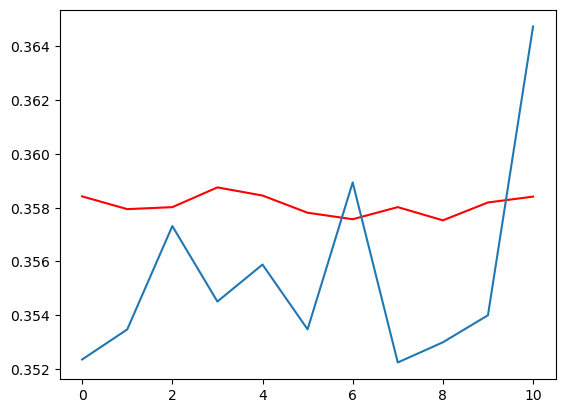

In [43]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], c='red')
plt.plot(history.history['val_loss'])

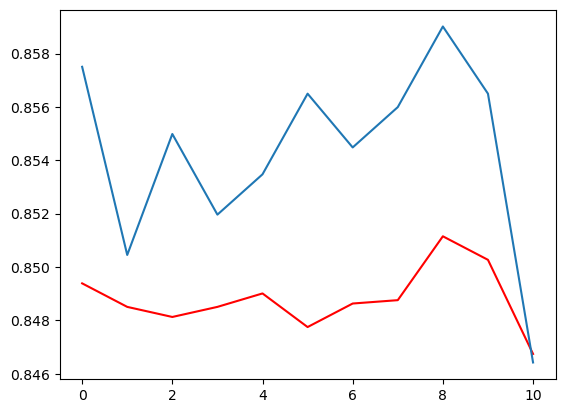

In [44]:
plt.plot(history.history['accuracy'], c='red')
plt.plot(history.history['val_accuracy'])

In [46]:
from mlxtend.plotting import plot_decision_regions

In [48]:
# plot_decision_regions(X_train, y_train, clf=model, legend=2)